<a href="https://www.kaggle.com/code/aneeshgrover/thapar-summer-school-competition-2?scriptVersionId=185451397" target="_blank"><img align="left" alt="Kaggle" title="Open in Kaggle" src="https://kaggle.com/static/images/open-in-kaggle.svg"></a>

# Thapar Summer School 2024 Kaggle Competition

## Overview

1. Import Libraries
2. Data Understanding and Exploration
3. Data Preprocessing
4. Model Building
5. Model Evaluation
6. Generate Predictions for Submission


## Importing the Libraries

In [1]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt 
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.ensemble import RandomForestClassifier

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))


/kaggle/input/thapar-summer-school-2024-competition-2/sample_submission (1).csv
/kaggle/input/thapar-summer-school-2024-competition-2/train.csv/train.csv
/kaggle/input/thapar-summer-school-2024-competition-2/test.csv/test.csv


## Data Understanding and Exploration

In [2]:
train = pd.read_csv("/kaggle/input/thapar-summer-school-2024-competition-2/train.csv/train.csv")
test = pd.read_csv("/kaggle/input/thapar-summer-school-2024-competition-2/test.csv/test.csv")

In [3]:
train.head

<bound method NDFrame.head of           id  Gender        Age    Height      Weight  \
0          0    Male  24.443011  1.699998   81.669950   
1          1  Female  18.000000  1.560000   57.000000   
2          2  Female  18.000000  1.711460   50.165754   
3          3  Female  20.952737  1.710730  131.274851   
4          4    Male  31.641081  1.914186   93.798055   
...      ...     ...        ...       ...         ...   
20753  20753    Male  25.137087  1.766626  114.187096   
20754  20754    Male  18.000000  1.710000   50.000000   
20755  20755    Male  20.101026  1.819557  105.580491   
20756  20756    Male  33.852953  1.700000   83.520113   
20757  20757    Male  26.680376  1.816547  118.134898   

      family_history_with_overweight FAVC      FCVC       NCP        CAEC  \
0                                yes  yes  2.000000  2.983297   Sometimes   
1                                yes  yes  2.000000  3.000000  Frequently   
2                                yes  yes  1.880534  1

In [4]:
print("Train Shape: ", train.shape)
print("Test Shape: ", test.shape)

print("\nMissing values in train: \n")
print(train.isnull().sum())
print("\nMissing values in test: \n")
print(test.isnull().sum())

print("Train Data Summary: ")
train.describe()


Train Shape:  (20758, 18)
Test Shape:  (13840, 17)

Missing values in train: 

id                                0
Gender                            0
Age                               0
Height                            0
Weight                            0
family_history_with_overweight    0
FAVC                              0
FCVC                              0
NCP                               0
CAEC                              0
SMOKE                             0
CH2O                              0
SCC                               0
FAF                               0
TUE                               0
CALC                              0
MTRANS                            0
NObeyesdad                        0
dtype: int64

Missing values in test: 

id                                0
Gender                            0
Age                               0
Height                            0
Weight                            0
family_history_with_overweight    0
FAVC             

,id,Age,Height,Weight,FCVC,NCP,CH2O,FAF,TUE
count,20758.00000,20758.000000,20758.000000,20758.000000,20758.000000,20758.000000,20758.000000,20758.000000,20758.000000
mean,10378.50000,23.841804,1.700245,87.887768,2.445908,2.761332,2.029418,0.981747,0.616756
std,5992.46278,5.688072,0.087312,26.379443,0.533218,0.705375,0.608467,0.838302,0.602113
min,0.00000,14.000000,1.450000,39.000000,1.000000,1.000000,1.000000,0.000000,0.000000
25%,5189.25000,20.000000,1.631856,66.000000,2.000000,3.000000,1.792022,0.008013,0.000000
50%,10378.50000,22.815416,1.700000,84.064875,2.393837,3.000000,2.000000,1.000000,0.573887
75%,15567.75000,26.000000,1.762887,111.600553,3.000000,3.000000,2.549617,1.587406,1.000000
max,20757.00000,61.000000,1.975663,165.057269,3.000000,4.000000,3.000000,3.000000,2.000000


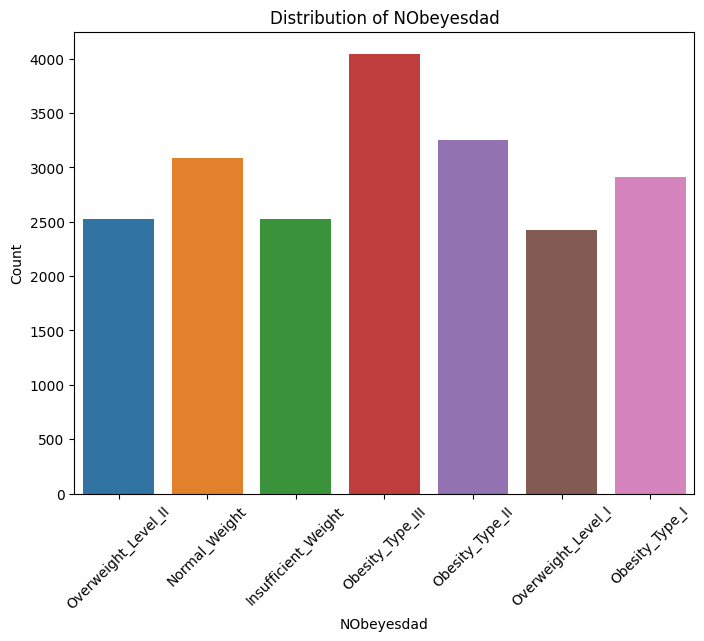

In [5]:
plt.figure(figsize = (8, 6))
sns.countplot(x = 'NObeyesdad', data = train)
plt.title('Distribution of NObeyesdad')
plt.xticks(rotation = 45)
plt.xlabel('NObeyesdad')
plt.ylabel('Count')
plt.show()

## Data Preprocessing

In [6]:
categoricalColumns = ['Gender', 'family_history_with_overweight', 'FAVC', 'CAEC', 'SMOKE', 'SCC', 'CALC', 'MTRANS']

combined = pd.concat([train, test], axis = 0, ignore_index = True)

labelEncoders = {}

for column in categoricalColumns:
    le = LabelEncoder()
    combined[column] = le.fit_transform(combined[column])
    labelEncoders[column] = le
    
train = combined[:len(train)]
test = combined[len(train):]


In [7]:
X = train.drop(columns=['NObeyesdad'])
Y = train['NObeyesdad']

In [8]:
Y.head

<bound method NDFrame.head of 0        Overweight_Level_II
1              Normal_Weight
2        Insufficient_Weight
3           Obesity_Type_III
4        Overweight_Level_II
                ...         
20753        Obesity_Type_II
20754    Insufficient_Weight
20755        Obesity_Type_II
20756    Overweight_Level_II
20757        Obesity_Type_II
Name: NObeyesdad, Length: 20758, dtype: object>

In [9]:
label_encoder = LabelEncoder()
Y_encoded = label_encoder.fit_transform(Y)


In [10]:
scaler = StandardScaler()
numericalColumns = ['Age', 'Height', 'Weight', 'FCVC', 'NCP', 'CH2O', 'FAF', 'TUE']
X.loc[:,numericalColumns] = scaler.fit_transform(X.loc[:,numericalColumns])
test.loc[:,numericalColumns] = scaler.transform(test.loc[:,numericalColumns])

## Model Building

### Training RandomForestClassifier

In [11]:
X_train, X_val, Y_train, Y_val = train_test_split(X, Y, test_size=0.2, random_state=42)

In [12]:
model = RandomForestClassifier(n_estimators = 1000, max_depth = 100, random_state = 1)

model.fit(X, Y_encoded)

RandomForestClassifier(max_depth=100, n_estimators=1000, random_state=1)

In [13]:
Predictions = model.predict_proba(test.drop(columns = ['NObeyesdad']))

In [14]:
predicted_labels = label_encoder.inverse_transform(np.argmax(Predictions, axis=1))

smth = pd.read_csv("/kaggle/input/thapar-summer-school-2024-competition-2/test.csv/test.csv")

Submission = pd.DataFrame({
    'id': smth['id'], 
    'NObeyesdad': predicted_labels
})

Submission.to_csv('Submission.csv', index = False)

